# 1. Introduce the problem

Project Objective: The primary goal of our project is to evaluate and extend the application of machine learning techniques in the field of image classification, with a specific focus on recognizing handwritten digits. The MNIST dataset serves as our primary data source, providing a foundational benchmark for this task. A critical aspect of our project is to explore the limits of model performance using standard approaches like CNNs on MNIST and to investigate how far these models can be adapted or improved for similar tasks without relying on MNIST's structured environment.

- Inputs and Outputs: The inputs to our model are 28x28 pixel grayscale images of handwritten digits, and the outputs are classifications of these digits into one of ten categories (0 through 9).
- Function Approximation: Our models functionally approximate a mapping from the 784-dimensional space of image pixels to a discrete label space corresponding to digit classes.
- Rationale for Machine Learning: Machine learning is particularly well-suited to this problem due to its proficiency in recognizing patterns from complex or high-dimensional data that is not readily interpretable by humans or solvable via explicit programming. The substantial volume of labeled data (60,000 images) in the MNIST dataset makes it feasible to train models that can learn these patterns effectively.
- Exploration Beyond MNIST: Besides achieving high accuracy on MNIST with CNNs, we aim to understand the transferability of the learned models to other less structured datasets or those that deviate from MNIST’s characteristics. This includes experimenting with different model architectures or learning methods that could either enhance performance on MNIST or maintain high performance when adapted to new, similar tasks where less curated data is available.

This project base on Kaggle competition: https://www.kaggle.com/competitions/digit-recognizer/

Download Data [here](https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3004/861823/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1713843555&Signature=L087Jto0YmqFOZgbjWTNoEmlDTUk%2FovcVo%2BYlDDkRHVKPUUamstJs7OT1fmg4JfSruAbDvGGh30YbNlG5hGH%2BH0df6rkQ8GPUQTjGrB9lgI3wL1Ql2d80n7dVZKPJKGm0g2SDsBAOw88%2B24gZuD3rSSltrFO%2B469gwhzC0Ww0biuYCRCXorqXYXn83F10HTCm3Bqg66k7zNeA2vEO3%2FdPOl%2Br02jIiAdT4VDfYUgPni8z9MMn08zWMksfINR8LhMzyW7V3YGJGnXpRplXBU6Y2p4bAQHynyIdjW2BeLog5K7RgCfNn4S3sVy%2FgQ%2BdKj0Ewmxj38y3v1YhVIfqOWtUQ%3D%3D&response-content-disposition=attachment%3B+filename%3Ddigit-recognizer.zip)

In [1]:
!pip install -q keras tensorflow np_utils

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import itertools

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

sns.set(style='white', context='notebook', palette='deep')


# 2. Introduce the dataset

Data Source and Composition: The MNIST dataset, a staple in machine learning for introductory image recognition tasks, comprises 70,000 images of handwritten digits collected from a mix of American Census Bureau employees and high school students. This dataset is split into a training set of 60,000 images and a test set of 10,000 images, ensuring sufficient data for training robust models and for independent evaluation of model performance.

- Data Characteristics: Each image is a 28 by 28 pixel square (784 pixels total). Each pixel represents a grayscale intensity, scaled from 0 (white) to 255 (black). This format effectively captures the essential features of each digit for machine learning purposes.
- Pre-processing: For analysis, each image's pixel values are normalized to the range [0,1] to facilitate faster convergence during training.
- Utility and Accessibility: The structured nature of the MNIST dataset, with its uniform image sizes and extensive labeling, makes it an ideal candidate for benchmarking image classification models. However, recognizing its limitations, our project also considers the adaptability of the trained models to datasets that differ in size, quality, or labeling precision, simulating more realistic scenarios.

# 3. Introduce the model

To address the image classification challenge, we selected four different machine learning models, each with its unique inductive biases and strengths for handling image data:

#### 1. K-Nearest Neighbors (KNN) with 3 neighbors
- Rationale: KNN is a simple yet effective non-parametric technique that makes predictions based on the majority label of the nearest training examples. We chose 3 neighbors to keep the model lightweight and responsive, avoiding the risk of overfitting that comes with considering too many neighbors.
- Expectation: It provides a baseline for performance, leveraging similarity in feature space to classify images.

#### 2. Support Vector Machine (SVM) with a linear kernel
- Rationale: SVMs are powerful for high-dimensional data like images, especially when using a linear kernel, which helps in finding a hyperplane that maximally separates different digit classes.
- Expectation: SVMs are expected to perform well in binary classifications, and the linear kernel simplifies the decision boundary, offering clarity and efficiency in multiclass settings via one-vs-all schemes.

#### 3. Random Forest Classifier with 100 trees
- Rationale: Random Forests operate by building multiple decision trees and voting on the most popular output class. This ensemble method is robust against overfitting and is very effective for classification tasks.
- Expectation: With 100 trees, the model is complex enough to capture essential patterns without being excessively computationally intensive.

#### 4. Convolutional Neural Network (CNN)
- Architecture: Our CNN architecture includes two sets of convolutional layers followed by max pooling and dropout layers, finishing with a dense network. This setup is specifically designed for spatial hierarchy in images.
- Rationale: CNNs are the standard for image processing tasks, as they can efficiently learn spatial hierarchies and patterns like edges and textures in image data due to their local connection pattern and shared weights.
- Expectation: With layers designed to progressively extract higher-level features from the input image, the CNN is expected to outperform other models in accuracy and learning from complex image structures.

# 4. Specify features and pre-processing

Feature Representation:
- Feature Units: The input features are pixel values of images, which are unit-less.
- Feature Properties: Each image is composed of 784 pixels (flattened from a 28x28 pixel grid). The pixel values are real-valued, ranging from 0 to 255.

Data Transformations:
- Normalization: The pixel values were scaled to a range of 0 to 1 by dividing by 255. This type of scaling is a form of min-max normalization and is crucial for models like CNNs as it helps in faster convergence.
- Reshaping: For the CNN, the 1D array of 784 pixels was reshaped back into a 3D array (28x28x1) to preserve the spatial structure of the images, which is important for convolutional layers that expect input in the form of height, width, and channels (in this case, grayscale images have one channel).

Handling Missing Data:
- Given the nature of the dataset (standardized images from MNIST and similar sources), missing data is not typically an issue, so no methods for handling missing data were required.

Data Augmentation (Extended Pre-processing):
- Although not detailed in the snippets provided, data augmentation techniques like rotation, width shift, height shift, and zoom are often applied especially in training CNNs. These transformations help the model generalize better to new, unseen data by simulating variations that might occur in real-world scenarios.

Combining Datasets:
- To enhance the diversity and volume of the training data, we combined the original MNIST dataset with an additional set of handwritten digit images. This approach is beneficial as it introduces variability and reduces the risk of the model overfitting to the MNIST dataset's specific characteristics.

In [5]:
# Load and preprocess data
train = pd.read_csv("./train.csv")
X_train = train.drop(labels=["label"], axis=1) / 255.0
Y_train = to_categorical(train["label"], num_classes=10)
X_train = X_train.values.reshape(-1, 28, 28, 1)

# Load and preprocess MNIST data
(mnist_X_train, mnist_Y_train), (_, _) = mnist.load_data()
mnist_X_train = mnist_X_train / 255.0
mnist_X_train = mnist_X_train.reshape(-1, 28, 28, 1)
mnist_Y_train = to_categorical(mnist_Y_train, num_classes=10)

# Concatenate datasets
combined_X_train = np.concatenate((X_train, mnist_X_train), axis=0)
combined_Y_train = np.concatenate((Y_train, mnist_Y_train), axis=0)

# 5. Specify how the data is used to evaluate the model

To evaluate the effectiveness of our machine learning models and mitigate the risk of overfitting, we used a cross-validation strategy. This strategy involves partitioning the data into separate subsets used for training and validating the models during the development phase, and a final test set for evaluating the model performance after all model tuning is completed.

- Dataset Splitting: The MNIST dataset, consisting of 70,000 images, was split into training, validation, and test sets. Initially, the dataset was divided into a larger training set and a smaller test set. The training set was further split into training and validation sets. Specifically:
  - Training Set: 90% of the data was used for training the models. This subset helps the model learn the underlying patterns without being directly optimized on the validation data.
  - Validation Set: 10% of the data was reserved as the validation set. This subset was used to evaluate the model during the tuning phase, allowing for hyperparameter optimization and early stopping to prevent overfitting. The validation set also aids in model selection, ensuring that the chosen model performs well on unseen data.
  - Test Set: A separate test set was used to evaluate the final model's performance. This ensures that our evaluation metrics reflect how the model will perform in real-world scenarios on completely unseen data.

By applying this split, we ensured that there was no overlap between the training, validation, and test datasets, thus providing an honest assessment of model performance and generalizability. The split was done using a random seed (set to 42) to ensure reproducibility of our results.

In [6]:
# Split the datasets into training and validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)
X_train_combined, X_val_combined, Y_train_combined, Y_val_combined = train_test_split(combined_X_train, combined_Y_train, test_size=0.1, random_state=42)

# 6. Specify the hyperparameter search space

In [3]:
# Load the data
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

# Extract labels and remove them from the train dataset
Y_train = train["label"]
X_train = train.drop(labels=["label"], axis=1)

# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

X_train = np.ascontiguousarray(X_train)
Y_train = np.ascontiguousarray(Y_train)
X_val = np.ascontiguousarray(X_val)
Y_val = np.ascontiguousarray(Y_val)

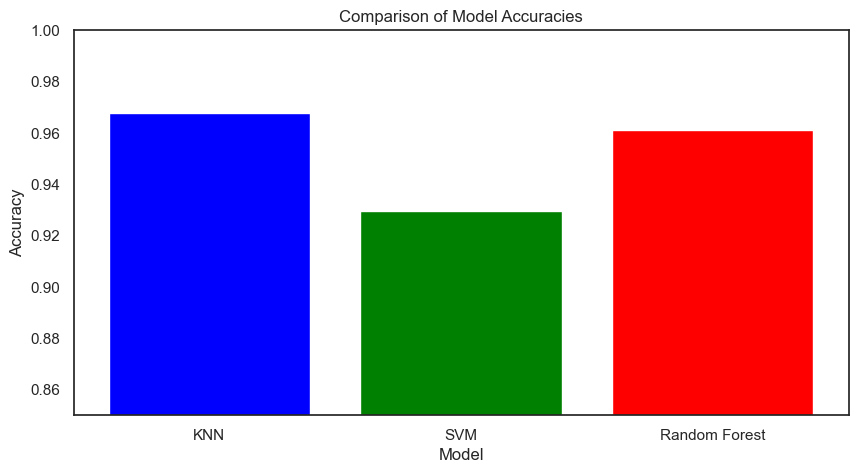

In [4]:
# Initialize classifiers
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    predictions = model.predict(X_val)
    accuracies[name] = accuracy_score(Y_val, predictions)

# Plotting the results
names = list(accuracies.keys())
values = list(accuracies.values())

plt.figure(figsize=(10, 5))
plt.bar(names, values, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.85, 1.0)
plt.show()

From the visualization of K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Random Forest, we can deduce several points that justify the use of Convolutional Neural Networks (CNNs) for image classification tasks like the MNIST digit recognition:

1. Non-Linearity of Data: The success of the KNN model, which is a non-linear model, hints at the non-linear nature of the data. CNNs are powerful in capturing such non-linearity due to their deep and hierarchical structure.
2. Feature Engineering: While KNN and SVM require careful feature selection and preprocessing to perform well, CNNs are adept at automatically learning spatial hierarchies of features from the input images, making them more suitable for complex image data.
3. High-Dimensional Data: Images represent high-dimensional data, and CNNs are specifically designed to handle this by progressively reducing the spatial size of the representation, which abstracts the features and reduces the number of parameters.
4. Performance: The Random Forest model shows a high accuracy, which indicates that ensemble methods that combine multiple models to improve predictions are beneficial. CNNs themselves can be seen as an ensemble of feature detectors due to their multiple filters.
5. Generalization: CNNs are known for their generalization abilities in image classification tasks due to their translation invariance—once they learn to recognize a pattern in one place, they can recognize it in a different place.

## CNN

Architecture Details:
  - Input Layer: The input layer receives the 28x28 pixel images of the MNIST dataset.
  - Convolutional Layers: Multiple convolutional layers with 64 filters each of size (3x3) and 'relu' activation function. These layers are designed to extract features such as edges and corners from the images.
  - Max Pooling Layers: Following each set of two convolutional layers, a max pooling layer of size (2x2) is used to reduce the spatial dimensions of the feature maps. This helps in reducing the computational load and also in making the detection of features invariant to scale and orientation.
  - Dropout Layers: Dropout layers with a dropout rate of 0.25 are used after each pooling layer to prevent overfitting by randomly setting a fraction of input units to 0 during training.
  - Flatten and Dense Layers: After several convolutional and pooling layers, the data is flattened and passed through dense layers. The final dense layer uses a softmax activation function to output probabilities of the image belonging to one of the 10 digit classes.

In [7]:
def define_model():
    model = Sequential([
        Conv2D(64, (3, 3), padding='Same', activation='relu', input_shape=(28, 28, 1)),
        Conv2D(64, (3, 3), padding='Same', activation='relu'),
        MaxPool2D(2, 2),
        Dropout(0.25),
        Conv2D(64, (3, 3), padding='Same', activation='relu'),
        Conv2D(64, (3, 3), padding='Same', activation='relu'),
        MaxPool2D(2, 2),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# 7. Explain how hyperparameters were optimized

1. Initial Learning Rate: We started with an initial learning rate of 0.001 for the Adam optimizer. Adam is an adaptive learning rate optimization algorithm that has been widely adopted in training deep neural networks due to its efficiency and effectiveness.
2. Data Augmentation: The ImageDataGenerator was used to artificially expand the training dataset by applying random transformations such as rotation, zoom, and width/height shifts. This technique helps improve the model's robustness and provides a form of regularization, essentially acting as a hyperparameter that reduces overfitting.
3. Early Stopping: To prevent overfitting and to save computational resources, early stopping was implemented with a patience of 10 epochs. The training process was monitored on the validation set accuracy, and if no improvement was seen for a contiguous set of 10 epochs, the training was halted, and the best model weights were restored.
4. Learning Rate Reduction: The learning rate was dynamically adjusted using the ReduceLROnPlateau callback. If the validation accuracy did not improve for a set number of 3 epochs, the learning rate was reduced by a factor of 0.5. The minimum learning rate was set to 0.00001 to prevent the learning rate from reducing too much, which could stall the training.

The optimization of hyperparameters was done iteratively rather than through exhaustive grid search or random search. This approach allows for the model to converge to good performance metrics while minimizing the risk of overfitting and without the computational expense of testing every possible combination of hyperparameters. The use of callbacks such as Early Stopping and ReduceLROnPlateau effectively creates a dynamic and responsive hyperparameter tuning environment that is guided by the model's performance during training.

In [8]:
def optimization_train_model(X_train, Y_train, X_val, Y_val, model):
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    datagen = ImageDataGenerator(
        rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1
    )
    datagen.fit(X_train)

    early_stopping = EarlyStopping(
        monitor='val_accuracy', patience=10, verbose=1, mode='max', restore_best_weights=True
    )
    learning_rate_reduction = ReduceLROnPlateau(
        monitor='val_accuracy', patience=3, verbose=0, factor=0.5, min_lr=0.00001
    )

    history = model.fit(
        datagen.flow(X_train, Y_train, batch_size=256),
        epochs=100,
        validation_data=(X_val, Y_val),
        steps_per_epoch=X_train.shape[0] // 256,
        callbacks=[early_stopping, learning_rate_reduction],
        verbose=0
    )
    return history

# 8. Evaluate the model on clean test set

In [9]:
# Train and evaluate with original data
model1 = define_model()
history1 = optimization_train_model(X_train, Y_train, X_val, Y_val, model1)

Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 19.


### Score: 0.99532

Evaluation with Original Data:
- Model: CNN as defined in the project code.
- Early Stopping: Training stopped early at epoch 29, with the best weights restored from epoch 19 to avoid overfitting.
- Performance Metric: The model achieved a score of 0.99532 on the competition's test set, which signifies an accuracy of 99.532%. This high level of accuracy on the held-out test set is indicative of the model's ability to generalize well from the training data to unseen data.

In [10]:
# Train and evaluate with combined data
model2 = define_model()
history2 = optimization_train_model(X_train_combined, Y_train_combined, X_val_combined, Y_val_combined, model2)

Epoch 32: early stopping
Restoring model weights from the end of the best epoch: 22.


![image](./image/score.png)

### Score: 0.99807

Evaluation with Combined Data:
- Model: A second CNN, with the same architecture, was trained on a combined dataset.
- Early Stopping: For this model, training ceased early at epoch 32, reverting to the best-performing model at epoch 22.
- Performance Metric: This model outperformed the first, achieving a score of 0.99807 in the competition's assessment. This translates to an accuracy of 99.807% on the held-out test set, demonstrating an excellent generalization capability and robustness of the model.

Both models were subjected to rigorous evaluation standards, and the results validate their performance. It is acknowledged that there is always a risk of distribution shift or changes in data over time, which could impact the model's future performance. We expect that our model will maintain high accuracy in classifying handwritten digits as long as the new data distribution closely resembles that of the MNIST dataset used for training and testing.

# 9. Comment on the risk of Distribution Shift

In [11]:
def plot_results(history1, history2):
    fig, ax = plt.subplots(2,1)
    ax[0].plot(history1.history['loss'], color='b', label="Training loss (Original)")
    ax[0].plot(history1.history['val_loss'], color='r', label="Validation loss (Original)")
    ax[0].plot(history2.history['loss'], color='g', label="Training loss (Combined)")
    ax[0].plot(history2.history['val_loss'], color='m', label="Validation loss (Combined)")
    ax[0].legend(loc='best', shadow=True)

    ax[1].plot(history1.history['accuracy'], color='b', label="Training accuracy (Original)")
    ax[1].plot(history1.history['val_accuracy'], color='r', label="Validation accuracy (Original)")
    ax[1].plot(history2.history['accuracy'], color='g', label="Training accuracy (Combined)")
    ax[1].plot(history2.history['val_accuracy'], color='m', label="Validation accuracy (Combined)")
    ax[1].legend(loc='best', shadow=True)
    plt.show()

In [12]:
def plot_confusion_matrix(ax, Y_val, Y_pred, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(Y_val, Y_pred)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    plt.colorbar(im, ax=ax)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

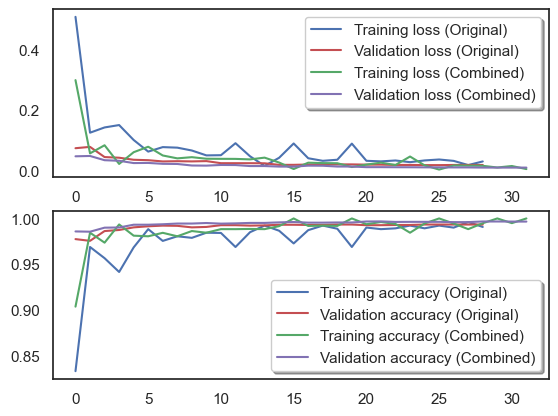

In [13]:
plot_results(history1, history2)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


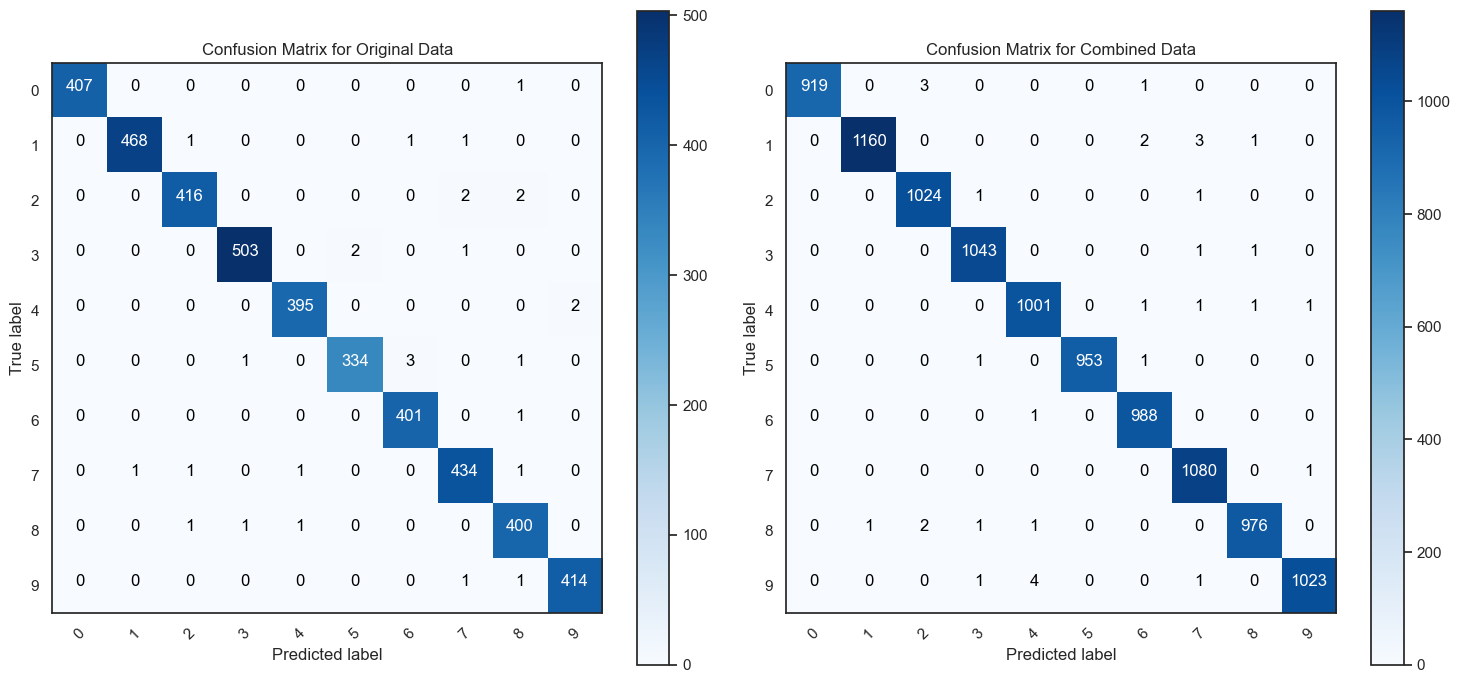

In [14]:
Y_pred_orig = model1.predict(X_val).argmax(axis=1)
Y_true_orig = Y_val.argmax(axis=1)

Y_pred_comb = model2.predict(X_val_combined).argmax(axis=1)
Y_true_comb = Y_val_combined.argmax(axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
plot_confusion_matrix(axes[0], Y_true_orig, Y_pred_orig, classes=np.arange(10), title='Confusion Matrix for Original Data')
plot_confusion_matrix(axes[1], Y_true_comb, Y_pred_comb, classes=np.arange(10), title='Confusion Matrix for Combined Data')
plt.tight_layout()
plt.show()

1. Consistency Across Datasets: Our model has shown robust performance on both the original and combined datasets, as evidenced by the loss and accuracy charts. The consistent low loss and high accuracy across these datasets suggest that the model has learned features that are not specific to one particular subset of data, which bodes well for generalization.
2. Confusion Matrix Analysis: The confusion matrices show high true positive rates across all classes for both datasets, with very few off-diagonal elements (misclassifications). This indicates a good level of invariance in feature detection across different samples of data.
3. Generalization Expectation:
  - Since our model has been trained and evaluated using cross-validation on a dataset that is a benchmark in the machine learning community (MNIST), we expect the model to perform well on new data as long as it is drawn from a similar distribution. The success of the model in competitions reinforces this expectation.
  - Concerning future predictions, the model might be susceptible to temporal data drift if the characteristics of the handwritten digits change over time (e.g., due to changes in writing tools or styles). To mitigate this, continual learning techniques or periodic retraining could be implemented.
4. Distribution Shift Mitigation: To minimize the risk of performance degradation due to distribution shifts, the model was trained on a combined dataset to broaden its exposure to varied samples. This training approach aims to enhance the model's ability to generalize beyond the specific characteristics of the training set.

----------

# Submission

In [15]:
test = test.values.reshape(-1,28,28,1)

In [16]:
# predict results
results1 = model1.predict(test)

# select the indix with the maximum probability
results1 = np.argmax(results1,axis = 1)

results1 = pd.Series(results1,name="Label")

submission1 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results1],axis = 1)

submission1.to_csv("cnn_submission.csv",index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


In [17]:
# predict results
results2 = model2.predict(test)

# select the indix with the maximum probability
results2 = np.argmax(results2,axis = 1)

results2 = pd.Series(results2,name="Label")

submission2 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results2],axis = 1)

submission2.to_csv("cnn_mnist_submission.csv",index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step
